## Importing all the required libraries

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # ignore warnings
pd.options.display.max_columns = 10000
pd.options.display.max_rows = 15
pd.options.display.max_colwidth = 100

### Loading the required data into a pandas dataframe

In [2]:
# load the dataset into the dataframe 'data'
data = pd.read_csv("Health_Data.csv", header=0, dtype = str, delimiter=",",encoding = "ISO-8859-1")

In [3]:
data.head(3)

,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,2015561331001,Pt aware that he needs ROV for refill,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green...,PRESCRIPTION,REFILL,No,2015_5_6133_1001
1,2015561341001,Mom wants to know if the Focalin needs some dosage adjusting,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6134_1001
2,2015561351001,pt called to discuss nortryptiline. she says she has a weird tas,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green0\blue255 ;\red0\g...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6135_1001


### The shape of the data is about 57280 rows and 7 columns

In [4]:
data.shape

(57280, 7)

In [5]:
My_data = data.ix[:, 0:7].copy()

### Checking if there is any missing data

In [6]:
count_nan = len(My_data) - My_data.count()
count_nan

fileid                     0
SUMMARY                 3347
DATA                       0
categories                 0
sub_categories             0
previous_appointment       2
ID                         0
dtype: int64

#### Column names

In [7]:
My_data.columns

Index(['fileid', 'SUMMARY', 'DATA', 'categories', 'sub_categories',
       'previous_appointment', 'ID'],
      dtype='object')

#### Setting fileid as index

In [8]:
My_data.set_index(keys='fileid', inplace=True)
My_data.head(3)

,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
fileid,,,,,,
2015561331001,Pt aware that he needs ROV for refill,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green...,PRESCRIPTION,REFILL,No,2015_5_6133_1001
2015561341001,Mom wants to know if the Focalin needs some dosage adjusting,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6134_1001
2015561351001,pt called to discuss nortryptiline. she says she has a weird tas,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green0\blue255 ;\red0\g...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6135_1001


### Below we are trying to find how many categories are there and 
### for each category how many records are there. 

In [11]:
# check the categories and sub-categories columns
My_data["categories"].unique()
My_data["categories"].value_counts()
My_data["categories"] = My_data["categories"].str.lower()
My_data["categories"].value_counts()

prescription     15096
appointments     13872
miscellaneous    12170
ask_a_doctor     11800
lab               4321
junk                21
Name: categories, dtype: int64

### Similarly we are trying to find how many sub-categories are there and 
### for each sub-category how many records are there. 

In [17]:
My_data["sub_categories"].unique()
My_data["sub_categories"].value_counts()
My_data["sub_categories"] = My_data["sub_categories"].str.lower()
My_data["sub_categories"].value_counts()

medication related                               10599
new appointment                                  10478
refill                                            9819
others                                            7356
sharing of health records (fax, e-mail, etc.)     3550
lab results                                       2650
provider                                          1972
                                                 ...  
cancellation                                       663
query on current appointment                       657
follow up on previous request                      357
change of hospital                                 149
queries from insurance firm                        107
change of pharmacy                                  55
junk                                                21
Name: sub_categories, Length: 21, dtype: int64

#### Understanding Data
Let's combine the columns SUMMARY and DATA to "conversation" <br>
Create a new dataframe with just the "converse" and "sub_categories" columns, in which the former is attribute and 
latter is the class variable which we have to predict

In [18]:
My_data["conversation"] = My_data.SUMMARY.map(str) + " " + My_data.DATA
data_final = My_data[["conversation", "sub_categories"]].copy()
data_final.head(3)

,conversation,sub_categories
fileid,,
2015561331001,Pt aware that he needs ROV for refill {\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green0\blue255 ;\red0\green0\blue0 ;\red0\green0\blue255 ;\red0\green128\blue0 ;}{\stylesheet{\f0\fs20\cf3\cb1 Normal;}{\cs1\additive\cf3\cb1 Default Paragraph Font;}}\margl1440\margr1440\margt540\margb1440\headery540\footery720\formshade\sectd\marglsxn1440\margrsxn1440\margtsxn540\margbsxn1440\headery540\footery720\sbkpage\pgncont\plain\plain\fs20\pard\plain\fs20\cf0\fs24\sscharaux1\b Phone Note \fs20\b0\par\b\par Call patient back at:\par\b0 Cell Phonexxxx-xxxx\par\fs24\b\par CALL FROM PATIENT\par\fs20 Caller Name: \b0xxxx-xxxx Caller: \b0 Patient\par\b Call For: \b0 Nurse\par\par\fs24\b Other \fs20\b0\par Patient is returning nurse call. He is unable to make appt without talking to fin service dept. However he needs medication and worried that he will have issue without medication. Please call patient to discuss. \par\b Call Taken by: \b0 xxxx-xxxx Ma...,refill
2015561341001,"Mom wants to know if the Focalin needs some dosage adjusting {\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green0\blue255 ;\red0\green0\blue0 ;\red0\green0\blue255 ;\red0\green128\blue0 ;}{\stylesheet{\f0\fs20\cf3\cb1 Normal;}{\cs1\additive\cf3\cb1 Default Paragraph Font;}}\margl1440\margr1440\margt540\margb1440\headery540\footery720\formshade\sectd\marglsxn1440\margrsxn1440\margtsxn540\margbsxn1440\headery540\footery720\sbkpage\pgncont\plain\plain\fs20\pard\plain\fs20\cf0\fs24\sscharaux1\b Phone Note \fs20\b0\par\b\par Call patient back at:\par\b0 Cell Phonexxxx-xxxx\par\fs24\b\par CALL FROM PATIENT\par\fs20 Caller Name: \b0xxxx-xxxx Caller: \b0 Patient\par\par\fs24\b Other \fs20\b0\par Pt's school teacher is reporting pt is not able to sit still, mom wants to know if the Focalin needs some dosage adjusting, and/or is there something pt could take that the school staff could administer? Please call back to discuss. \par\b Call Taken by:...",medication related
2015561351001,"pt called to discuss nortryptiline. she says she has a weird tas xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green0\blue255 ;\red0\green0\blue0 ;\red0\green0\blue255 ;\red0\green128\blue0 ;}{\stylesheet{\f0\fs20\cf3\cb1 Normal;}{\cs1\additive\cf3\cb1 Default Paragraph Font;}}\margl1440\margr1440\margt540\margb1440\headery540\footery720\formshade\sectd\marglsxn1440\margrsxn1440\margtsxn540\margbsxn1440\headery540\footery720\sbkpage\pgncont\plain\plain\fs20\pard\plain\fs20\cf0\fs24\sscharaux1\b Phone Note \fs20\b0\par\b\par Call patient back at:\par\b0 Home Phonexxxx-xxxx\par\fs24\b\par CALL FROM PATIENT\par\fs20 Caller: \b0 Patient\par\par\fs24\b Prescription \fs20\b0\par\b Other Prescription Comments:\par\b0 pt called to discuss nortryptiline. she says she has a weird taste in her mouth and pt also sweats heavily, please call to discuss.\par\b Call Taken by: \b0 xxxx-xxxx , May 22, 2015 9:09 AM\par\par\fs24\b RNA Follow-up\fs20\b0\par\b Follow-up Detai...",medication related


#### Sample Conversation data

In [19]:
# Sample Conversation of a single call (1 row in the data)
print(data_final.ix[2, "conversation"])

pt called to discuss nortryptiline. she says she has a weird tas xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red255\green255\blue255 ;\red0\green0\blue255 ;\red0\green0\blue0 ;\red0\green0\blue255 ;\red0\green128\blue0 ;}{\stylesheet{\f0\fs20\cf3\cb1 Normal;}{\cs1\additive\cf3\cb1 Default Paragraph Font;}}\margl1440\margr1440\margt540\margb1440\headery540\footery720\formshade\sectd\marglsxn1440\margrsxn1440\margtsxn540\margbsxn1440\headery540\footery720\sbkpage\pgncont\plain\plain\fs20\pard\plain\fs20\cf0\fs24\sscharaux1\b Phone Note \fs20\b0\par\b\par Call patient back at:\par\b0 Home Phonexxxx-xxxx\par\fs24\b\par CALL FROM PATIENT\par\fs20 Caller: \b0 Patient\par\par\fs24\b Prescription \fs20\b0\par\b Other Prescription Comments:\par\b0 pt called to discuss nortryptiline. she says she has a weird taste in her mouth and pt also sweats heavily, please call to discuss.\par\b Call Taken by: \b0 xxxx-xxxx ,  May 22, 2015 9:09 AM\par\par\fs24\b RNA Follow-up\fs20\b0\par\b Follow-up Details: 

## Preprocessing

#### The column "DATA" contains data of "Rich Text Format". Many important features
#### are tagged with certain tags. Regular expressions can be used to extract data.

#### From above we have to convert it to readable format
#### I am doing it by using Regualar Expressions

In [20]:
data_final["conversation"] = data_final["conversation"].str.replace(pat=r"(\\\w*)|[{}-]|(xxxx)|(\w*;)|[^a-zA-Z]", repl=" ")
pd.options.display.max_colwidth = 1000

In [21]:
# Below is an example of one conversation
print(data_final.ix[1, "conversation"])

Mom wants to know if the Focalin needs some dosage adjusting                                                             Default Paragraph                               Phone Note       Call patient back at    Cell Phone        CALL FROM PATIENT   Caller Name      Caller    Patient     Other     Pt s school teacher is reporting pt is not able to sit still  mom wants to know if the Focalin needs some dosage adjusting  and or is there something pt could take that the school staff could administer  Please call back to discuss     Call Taken by           May               PM   Follow up Details    Mom sts patient is having alot of issues with meds  and effectiveness  LOV                  rescheduled to         and that was a No Show  Mom apologized for the no show  She sts they disconnected the home number and only use the cell  Appt scheduled for         at     Advd to be here at        Action Taken    Phone Call Completed  Appt Scheduled   Follow up by    Marcia Richardson LPN    May    

### We still have to preprocess and clean the data
#### <font color="blue"> I have decided to take out all the repeated words in all the documents. <br> <br> They are ["Default Paragraph","Phone Note","Call patient back at","Cell Phone","CALL FROM PATIENT","Caller","Other",..etc]

In [22]:
pattern = "Default Paragraph|Phone Note|Call patient back at|Cell Phone|CALL FROM PATIENT| \
                Caller|Other|Arial|Font|Courier New|Normal|Please call back to discuss|xxx|xx"
data_final["conversation"] = data_final["conversation"].str.replace(pat=pattern, repl="")
print(data_final.ix[1, "conversation"])
pd.options.display.max_colwidth = 100

Mom wants to know if the Focalin needs some dosage adjusting                                                                                                                  Caller Name      Caller    Patient          Pt s school teacher is reporting pt is not able to sit still  mom wants to know if the Focalin needs some dosage adjusting  and or is there something pt could take that the school staff could administer       Call Taken by           May               PM   Follow up Details    Mom sts patient is having alot of issues with meds  and effectiveness  LOV                  rescheduled to         and that was a No Show  Mom apologized for the no show  She sts they disconnected the home number and only use the cell  Appt scheduled for         at     Advd to be here at        Action Taken    Phone Call Completed  Appt Scheduled   Follow up by    Marcia Richardson LPN    May               PM          


### Preprocessing Continues... 
- lowercase the target labels
- remove junk column
- tokenize
- remove stopwords
- remove identified mis-spellings

In [24]:
# let's lowecase all the fields in categories and sub-categories
data_final.loc[:, "sub_categories"] = data_final.loc[:, "sub_categories"].str.lower()

# check for unique values in each column
data_final["sub_categories"].value_counts()
print("Total number of sub-categories:",len(data_final["sub_categories"].unique()))

Total number of sub-categories: 21


In [28]:
data_final.head(1)

,conversation,sub_categories,converse_tokens
fileid,,,
2015561331001,Pt aware that he needs ROV for refill ...,refill,"[Pt, aware, that, he, needs, ROV, for, refill, Caller, Name, Caller, Patient, Call, For, Nurse, ..."


In [25]:
# print(data_final.loc[data_final["sub_categories"] == "junk"]["converse"][7])

# junk category has nothing helpful in it. Let's remove the column
data_final = data_final[data_final.sub_categories != "junk"]

In [258]:
print(data_final.ix[1, "conversation"])

Mom wants to know if the Focalin needs some dosage adjusting                                                                                                                  Caller Name      Caller    Patient          Pt s school teacher is reporting pt is not able to sit still  mom wants to know if the Focalin needs some dosage adjusting  and or is there something pt could take that the school staff could administer       Call Taken by           May               PM   Follow up Details    Mom sts patient is having alot of issues with meds  and effectiveness  LOV                  rescheduled to         and that was a No Show  Mom apologized for the no show  She sts they disconnected the home number and only use the cell  Appt scheduled for         at     Advd to be here at        Action Taken    Phone Call Completed  Appt Scheduled   Follow up by    Marcia Richardson LPN    May               PM          


In [27]:
# tokenize the words
import nltk
data_final["converse_tokens"] = pd.Series(data_final.conversation.apply(nltk.word_tokenize), index=data_final.index)

data_final.head(3)

,conversation,sub_categories,converse_tokens
fileid,,,
2015561331001,Pt aware that he needs ROV for refill ...,refill,"[Pt, aware, that, he, needs, ROV, for, refill, Caller, Name, Caller, Patient, Call, For, Nurse, ..."
2015561341001,Mom wants to know if the Focalin needs some dosage adjusting ...,medication related,"[Mom, wants, to, know, if, the, Focalin, needs, some, dosage, adjusting, Caller, Name, Caller, P..."
2015561351001,pt called to discuss nortryptiline she says she has a weird tas ...,medication related,"[pt, called, to, discuss, nortryptiline, she, says, she, has, a, weird, tas, Home, Phone, Caller..."


### Spell Check

In [29]:
# lowercase all the words

for i in range(len(data_final.converse_tokens)):
    data_final.converse_tokens[i] = [l.lower() for l in data_final.converse_tokens[i]]

In [30]:
# check spellings and replace the identified spelling mistakes
# dictionary of identified spellings
spelling_mis = {
    "aclled":"called",
    "acll":"called",
    "aappt":"appointment",
    "aapt":"appointment",
    "pt":"patient",
    "appt":"appointment",
    "clld":"called",
    "med":"medical",
    "sch":"schedule",
    "sz":"seizure",
    "spk":"speak",
    "chk":"check",
    "abt":"about",
    "req":"request",
    "pts":"patient",
    "pls":"please",
    "dr":"doctor",
    "rec":"record",
    "appts":"appointment",
    "attn":"attention",
    "ext":"extention",
    "soln":"solution"
}

for i in range(len(data_final.converse_tokens)):
    for j in range(len(data_final.converse_tokens[i])):
        if data_final.converse_tokens[i][j] in spelling_mis.keys():
            data_final.converse_tokens[i][j] = spelling_mis[data_final.converse_tokens[i][j]]

data_final.converse_tokens.head(1)

fileid
2015561331001    [patient, aware, that, he, needs, rov, for, refill, caller, name, caller, patient, call, for, nu...
Name: converse_tokens, dtype: object

In [31]:
from nltk.probability import FreqDist

all_words = []
for wordlist in data_final.converse_tokens[:100]:
    all_words += wordlist

FreqDist(all_words).most_common()

[('to', 322),
 ('up', 276),
 ('patient', 267),
 ('follow', 266),
 ('by', 202),
 ('may', 191),
 ('call', 184),
 ('and', 174),
 ('details', 140),
 ('for', 131),
 ('pm', 116),
 ('am', 116),
 ('the', 114),
 ('caller', 113),
 ('she', 109),
 ('is', 105),
 ('a', 103),
 ('of', 98),
 ('taken', 90),
 ('additional', 84),
 ('appointment', 78),
 ('mg', 77),
 ('with', 72),
 ('her', 72),
 ('in', 69),
 ('please', 67),
 ('that', 66),
 ('rx', 64),
 ('he', 63),
 ('on', 62),
 ('called', 61),
 ('rn', 60),
 ('was', 57),
 ('has', 55),
 ('if', 53),
 ('mom', 51),
 ('at', 51),
 ('from', 50),
 ('rna', 48),
 ('phone', 47),
 ('not', 46),
 ('po', 43),
 ('name', 38),
 ('i', 36),
 ('pharmacy', 36),
 ('x', 36),
 ('s', 35),
 ('will', 34),
 ('doctor', 34),
 ('refill', 33),
 ('back', 32),
 ('fax', 32),
 ('tabs', 32),
 ('home', 31),
 ('md', 30),
 ('clinical', 30),
 ('form', 29),
 ('list', 29),
 ('can', 28),
 ('prescription', 28),
 ('then', 28),
 ('but', 28),
 ('changes', 28),
 ('entered', 28),
 ('authorized', 28),
 ('hcl'

In [32]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [33]:
def correct_words(wrong_list):
    correct_words = dict()
    for i in range(len(wrong_list)):
        if wrong_list[i] in correct_words.keys():
            wrong_list[i] = correct_words[wrong_list[i]]
        else:
            correct_word = correction(wrong_list[i])
            correct_words[wrong_list[i]] = correct_word
            wrong_list[i] = correct_word

In [38]:
# takes long time (optional)
# %%time
#for i in range(len(data_final.converse_tokens)):
#    correct_words(data_final.converse_tokens[i])

In [39]:
# stemmer
from nltk.stem import PorterStemmer

minlength = 2
stemmer = PorterStemmer()
for i in range(len(data_final.converse_tokens)):
    data_final.converse_tokens[i] = [stemmer.stem(l) for l in data_final.converse_tokens[i]
                                     if len(l.lower()) >= minlength]

In [40]:
# lower all the words and remove stop words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopset = set(stopwords.words("english"))
lmtzr = WordNetLemmatizer()
minlength = 2
for i in range(len(data_final.converse_tokens)):
    data_final.converse_tokens[i] = [lmtzr.lemmatize(l) for l in data_final.converse_tokens[i] 
                                     if not l in stopset and len(l) >= minlength]

data_final.converse_tokens.head(3)
pd.options.display.max_colwidth = 1000
print(data_final.converse_tokens.head(1))
pd.options.display.max_colwidth = 100

fileid
2015561331001    [patient, war, need, row, refil, call, name, call, patient, call, nurs, patient, return, nurs, call, unabl, make, appoint, without, talk, servic, kept, howe, need, medium, worri, issu, without, medium, plea, call, patient, discus, call, taken, may, pm, call, back, follow, detail, patient, return, phone, call, plea, call, back, advis, may, admit, follow, detail, problem, without, insur, ha, non, complaint, instruct, come, follow, appoint, refil, without, one, admit, follow, david, may, admit, follow, detail, spoke, patient, relay, abov, request, speak, financ, servic, transfer, busi, offic, request, busi, offic, call, matter, ha, complet, follow, holli, salt, may, admit, follow, detail, ok, admit, ...]
Name: converse_tokens, dtype: object


### Split the data, Transform and fit the training data

In [41]:
# dividing train and test data

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_final.converse_tokens, data_final.sub_categories, 
                                                    stratify=data_final.sub_categories.tolist(), test_size=0.3, random_state=13)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
for i in range(len(x_train)):
    x_train.ix[i] = " ".join(x_train.ix[i])
x_train.head(1)

for i in range(len(x_test)):
    x_test.ix[i] = " ".join(x_test.ix[i])
x_test.head(1)

fileid
20157110801001    rna follow follow detail call talk patient daughter evetta okay per hipaa receiv anoth fax reque...
Name: converse_tokens, dtype: object

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy.sparse

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=0.002, stop_words="english", max_df=0.95)
#countf = CountVectorizer(ngram_range=(1,1), min_df=0.002, stop_words="english", max_df=0.95)
# tfidf2 = TfidfVectorizer(ngram_range=(2,2))

X_tfidf = tfidf.fit_transform(x_train.astype("U"))
#X_countf = countf.fit_transform(x_train.astype("U"))
#X = scipy.sparse.hstack([X_tfidf, X_countf])
X_train = X_tfidf
X_test = tfidf.transform(x_test)
# X2 = tfidf2.fit_transform(data_final.converse_tokens.astype("U"))

In [277]:
print(X_train.shape)
X_train

(40081, 7565)


<40081x7565 sparse matrix of type '<class 'numpy.float64'>'
	with 2602106 stored elements in Compressed Sparse Row format>

## Model Building
## Naive Bayes

In [45]:
%%time
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
pred_nb = clf.predict(X_test)

CPU times: user 403 ms, sys: 15.1 ms, total: 418 ms
Wall time: 621 ms


In [48]:
warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, pred_nb)
pre = precision_score(y_test, pred_nb, average = 'macro')
rec = recall_score(y_test, pred_nb, average = 'macro')
f1 = f1_score(y_test, pred_nb, average = 'macro')
print("accuracy: ", acc,"\nprecision: ", pre,"\nrecall: ", rec, "\nf1: ", f1)
print("kappa score: ", cohen_kappa_score(y_test, pred_nb))

accuracy:  0.625684014437 
precision:  0.505347069772 
recall:  0.358578716308 
f1:  0.376628588292
kappa score:  0.561746241959


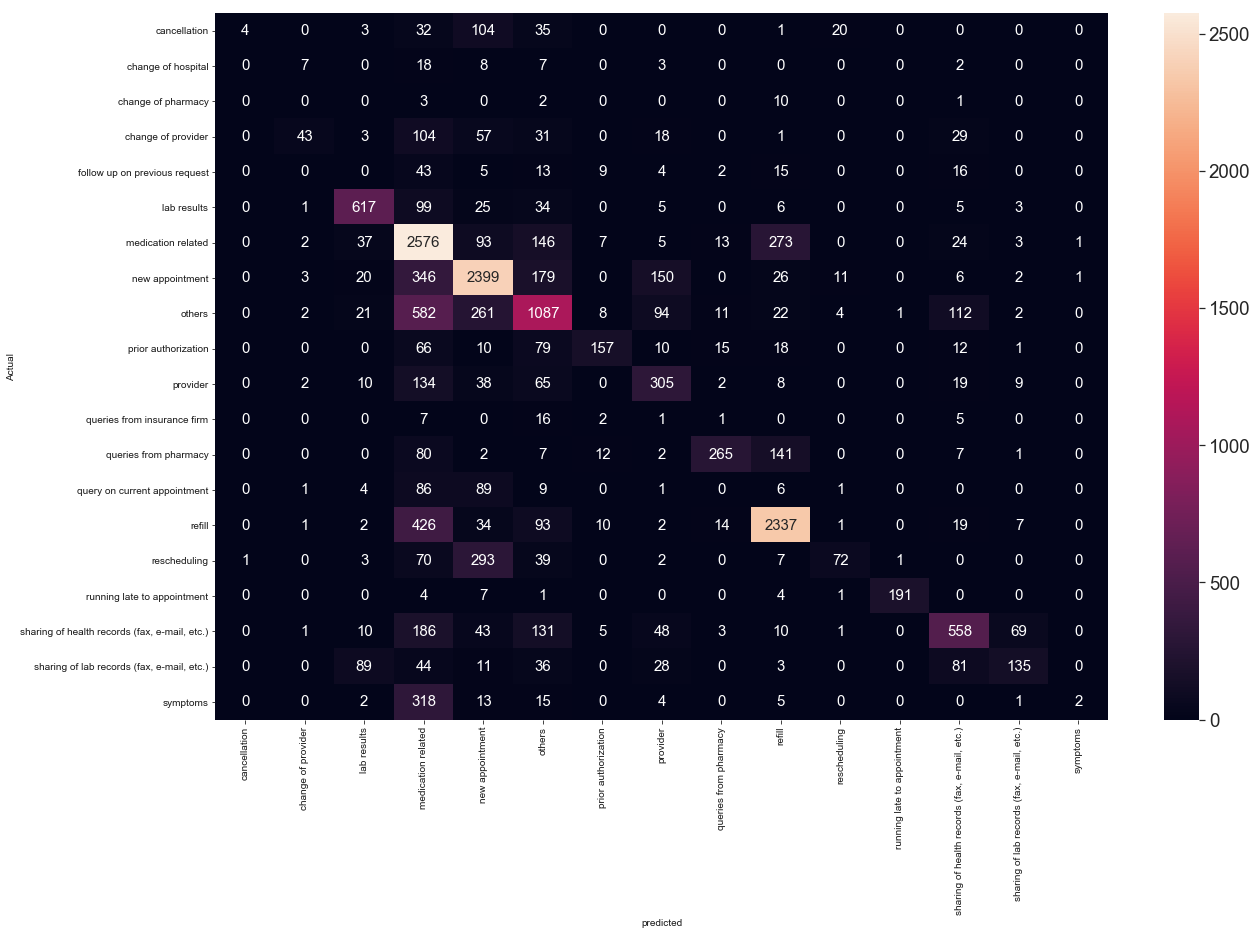

In [49]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, pred_nb)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, pred_nb, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

fig, ax = plt.subplots(figsize=(20,13))
sn.set(font_scale=1.7)
cm_plot = sn.heatmap(cm, annot=True, annot_kws={"size":15}, ax=ax, fmt=".0f")#, square=True)
fig = cm_plot.get_figure()
fig.savefig("cm_nb")

## Logistic Regression

In [50]:
%%time
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=10, penalty='l2', class_weight="balanced")
logreg.fit(X_train, y_train)

CPU times: user 28 s, sys: 125 ms, total: 28.1 s
Wall time: 28.3 s


In [52]:
pred_log = logreg.predict(X_test)

warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score
acc = accuracy_score(y_test, pred_log)
pre = precision_score(y_test, pred_log, average = 'macro')
rec = recall_score(y_test, pred_log, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, pred_log))

accuracy:  0.706426825009 
 precision:  0.549921598313 
 recall:  0.603562590316
kappa score:  0.667943189337


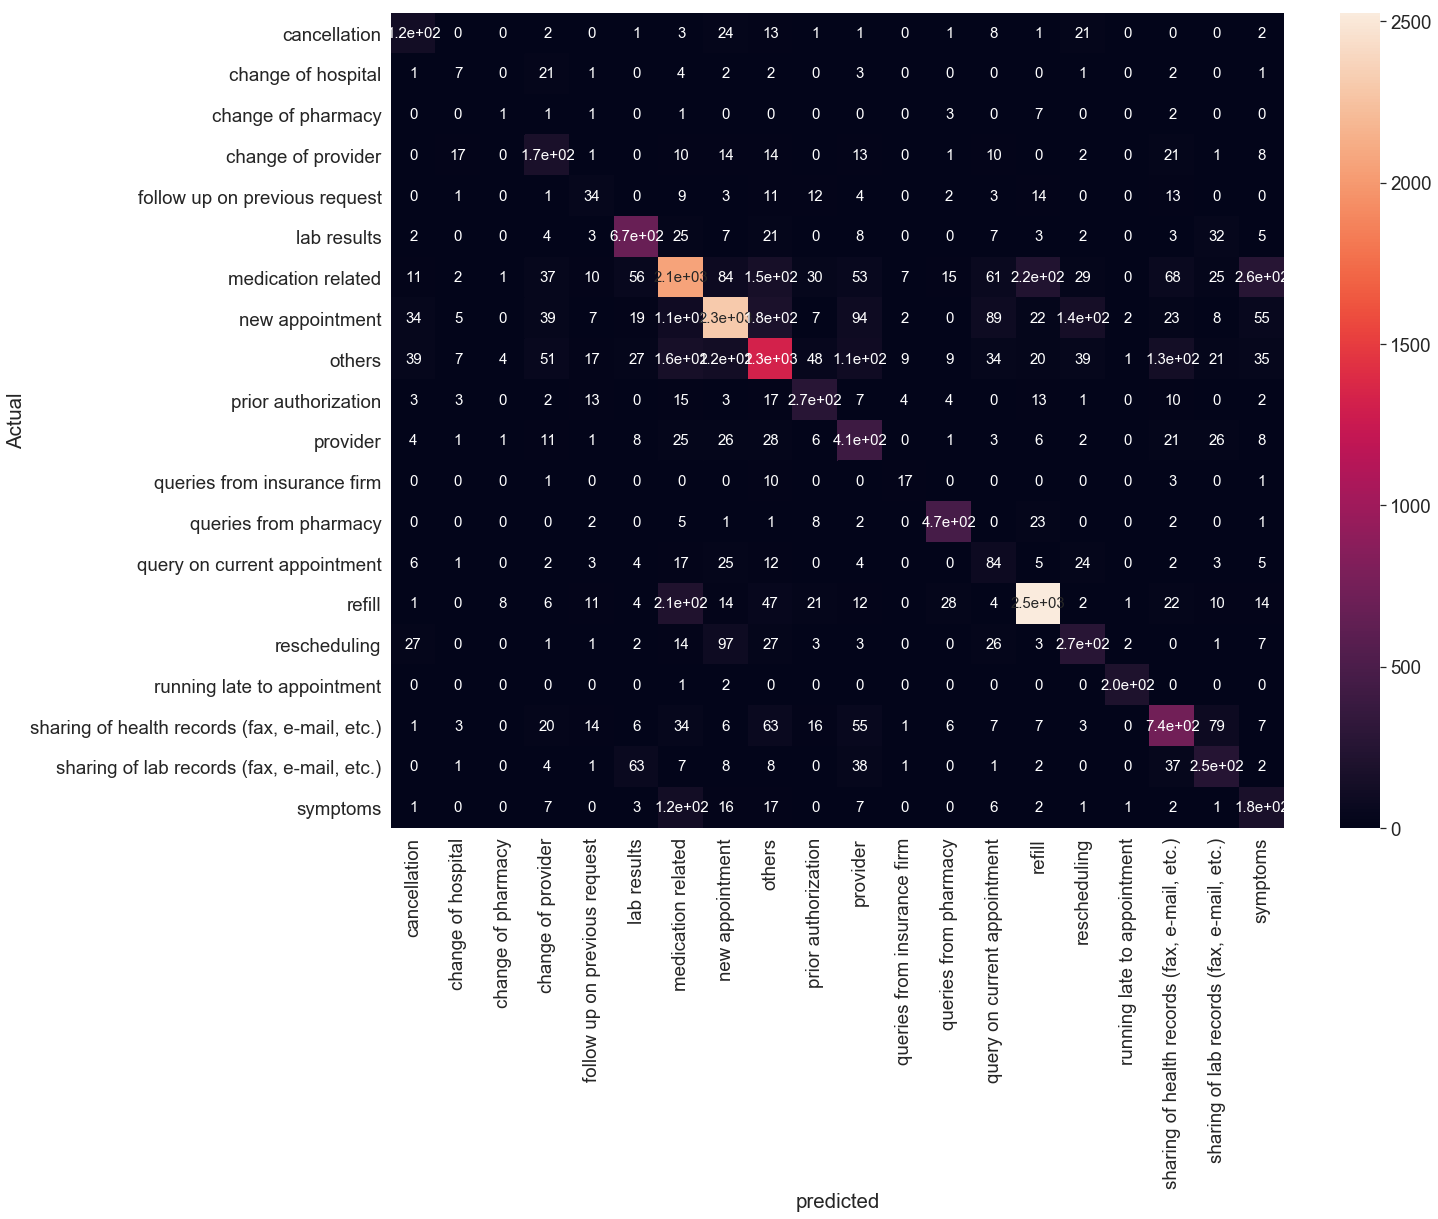

In [53]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, pred_log)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, pred_log, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

fig, ax = plt.subplots(figsize=(20,15))
sn.set(font_scale=1.7)
cm_plot = sn.heatmap(cm, annot=True, annot_kws={"size":15}, ax=ax)#, square=True)
fig = cm_plot.get_figure()
fig.savefig("cm_lg")

#### Logistic Regression Grid Search

In [54]:
%%time
from sklearn.grid_search import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(logreg, param_grid)
clf.fit(X_train, y_train)

CPU times: user 6min 48s, sys: 3.82 s, total: 6min 52s
Wall time: 6min 58s


In [58]:
print(clf.best_params_)
# C: 10

{'C': 10}


In [60]:
# pickle
import pickle
logreg = clf
filename = "logreg_opt.sav"
pickle.dump(logreg, open(filename, "wb"))

In [61]:
filename = "logreg_opt.sav"
pickled_logreg = pickle.load(open(filename, 'rb'))
pred_log_grid = pickled_logreg.predict(X_test)

In [62]:
# pred_log_grid = clf.predict(X_test)

warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score
acc = accuracy_score(y_test, pred_log_grid)
pre = precision_score(y_test, pred_log_grid, average = 'macro')
rec = recall_score(y_test, pred_log_grid, average = 'macro')
f1 = f1_score(y_test, pred_log_grid, average = 'macro')
print("accuracy: ", acc,"\nprecision: ", pre,"\nrecall: ", rec, "\nf1: ", f1)
print("kappa score: ", cohen_kappa_score(y_test, pred_log_grid))

accuracy:  0.706426825009 
precision:  0.549921598313 
recall:  0.603562590316 
f1:  0.571413287588
kappa score:  0.667943189337


In [66]:
#from sklearn.cross_validation import cross_val_score

#results = cross_val_score(clf, X_train, y_train, cv=5)
#print(results.mean())

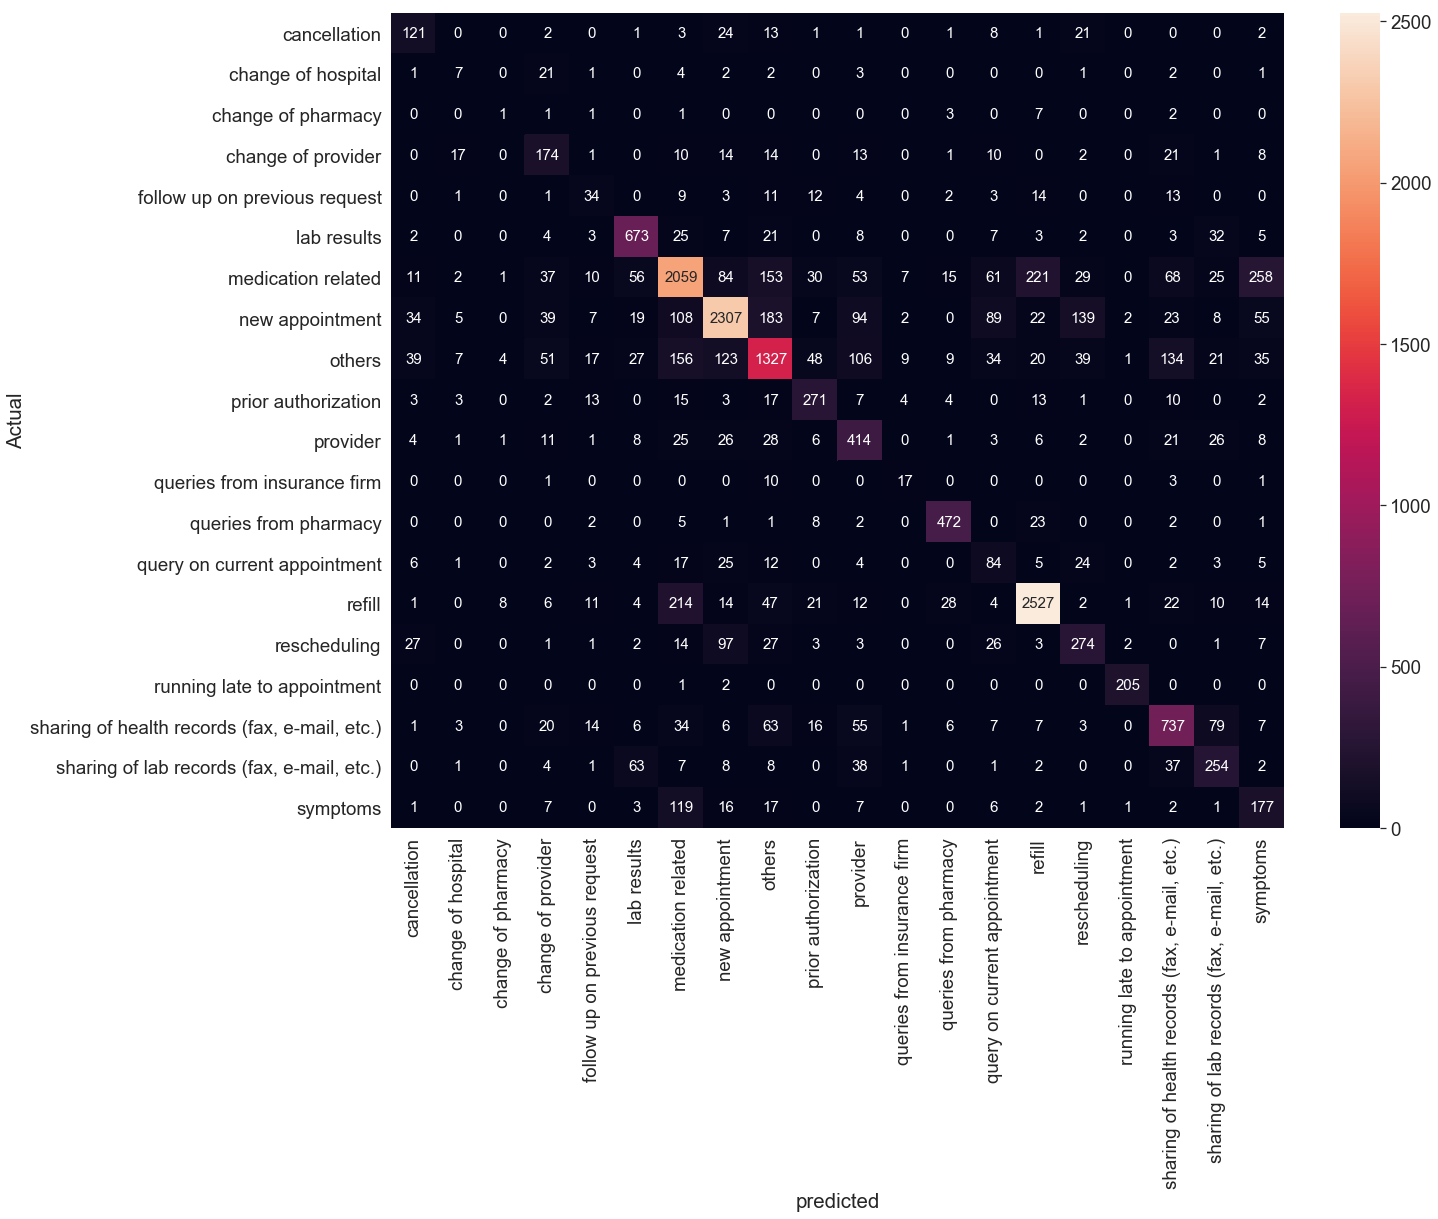

In [67]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, pred_log_grid)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, pred_log_grid, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

fig, ax = plt.subplots(figsize=(20,15))
sn.set(font_scale=1.7)
cm_plot = sn.heatmap(cm, annot=True, annot_kws={"size":15}, ax=ax, fmt=".0f")#, square=True)
fig = cm_plot.get_figure()
fig.savefig("cm_lg_grid")

## Random Forest

In [68]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier(n_estimators=100, max_depth=1000, max_features="sqrt", class_weight="balanced_subsample", n_jobs=-1).fit(X_train, y_train)

CPU times: user 3min 49s, sys: 1.83 s, total: 3min 51s
Wall time: 1min 7s


In [69]:
rfc1 = RandomForestClassifier(n_estimators=1000, max_depth=100, max_features="sqrt", class_weight="balanced_subsample", n_jobs=-1).fit(X_train, y_train)
warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score
pred_rfc1 = rfc1.predict(X_test)
acc = accuracy_score(y_test, pred_rfc1)
pre = precision_score(y_test, pred_rfc1, average = 'macro')
rec = recall_score(y_test, pred_rfc1, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, pred_rfc1))

accuracy:  0.704214693212 
 precision:  0.603182340496 
 recall:  0.480315246806
kappa score:  0.657233040371


In [70]:
# let's save model to disk using pickle

filename = "rfc.sav"

In [71]:
pickle.dump(rfc, open(filename, 'wb'))

In [72]:
# testing pickle
# load the model from disk
pickled_rfc = pickle.load(open(filename, 'rb'))
pred_rfc = pickled_rfc.predict(X_test)

In [73]:
warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score
# pred_rfc = rfc.predict(X_test)
acc = accuracy_score(y_test, pred_rfc)
pre = precision_score(y_test, pred_rfc, average = 'macro')
rec = recall_score(y_test, pred_rfc, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, pred_rfc))

accuracy:  0.698218651764 
 precision:  0.614302623345 
 recall:  0.468643063087
kappa score:  0.650053569449


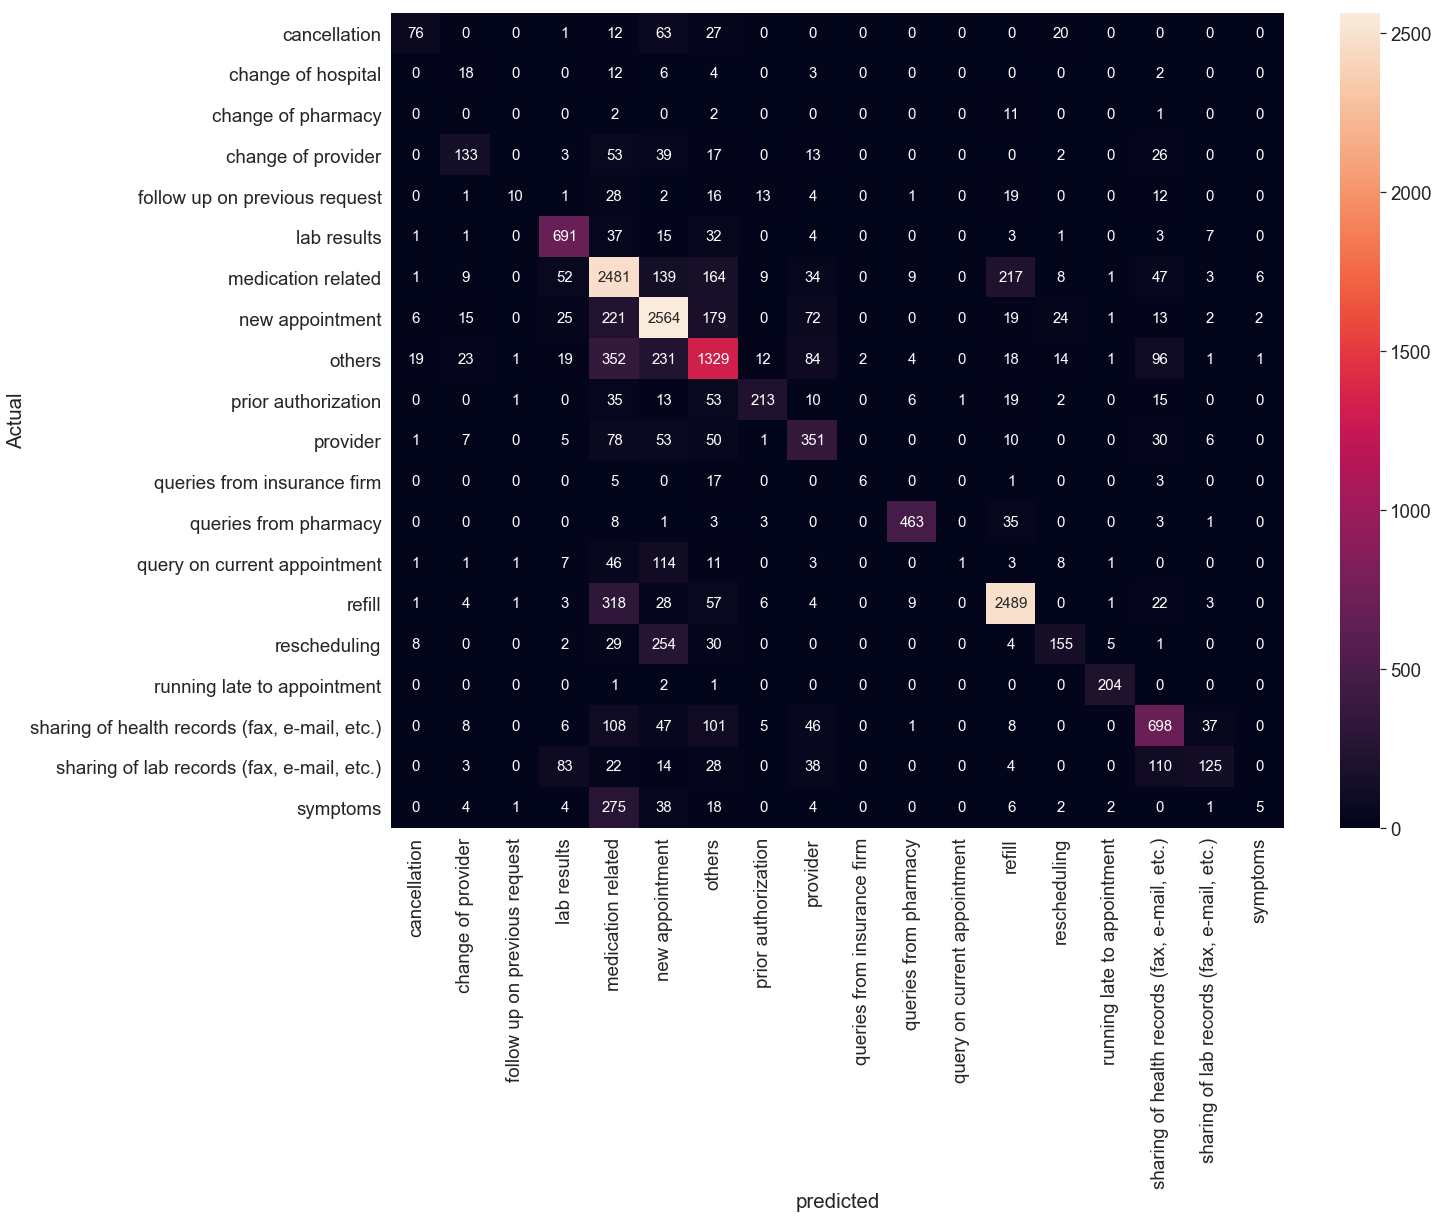

In [77]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, pred_rfc)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, pred_rfc, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

plt.figure(figsize=(20, 15))
sn.set(font_scale=1.7)
sn.heatmap(cm, annot=True, annot_kws={"size":15}, fmt=".0f")
plt.show()

#### Random Forest Grid Search

## Insights from confusion matrix
<ul>
<li>The model didn't predict the <b>queries from insurance firm</b>, <b>change of hospital</b> and <b>change of pharmacy</b> not at least once</li>
<li>some confusion for model in predicting <b>sharing of health records</b> and <b>sharing of lab records</b></li>
<li>some minimal misclassifications in <b>medication related</b>, <b>new appointment</b>, <b>others</b>, 
<b>provider</b>, <b>refill</b> with <b>medication related</b>, <b>sharing of health records</b></li>
<li>less to very less predictions with 
<ol>
<li><b>symptoms</b> wrongly classified with <b>medication related</b></li>
<li><b>queries from insurance firm</b></li>
<li><b>follow up on previous request</b></li>
<li><b>provider</b></li>
</ol>
</ul>

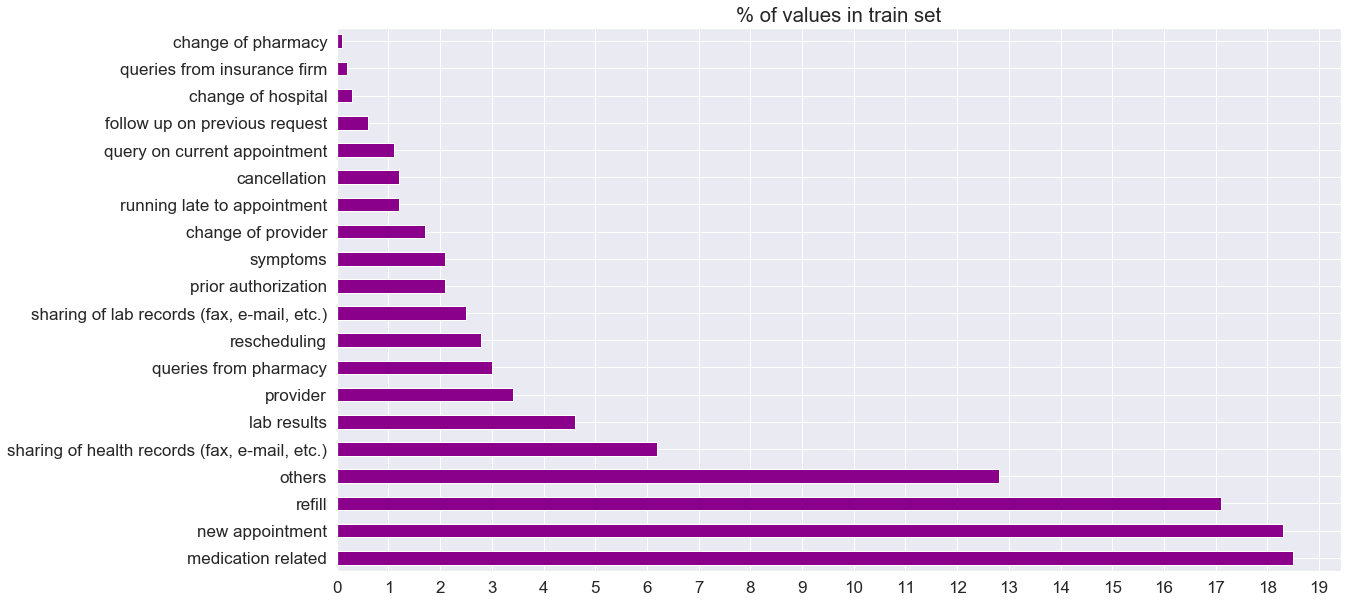

In [81]:
percent_train = round(100 * y_train.value_counts()/len(y_train), 1)
percent_train.plot(kind="barh", color="darkmagenta", title="% of values in train set", grid=True, figsize=(18, 10), fontsize=17, xticks=np.arange(0, 20))
plt.show()

## Gradient Boost

In [82]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, random_state=13).fit(X_train, y_train)

CPU times: user 28min 31s, sys: 11.3 s, total: 28min 42s
Wall time: 29min 1s


In [83]:
gbc_pred = gbc.predict(X_test.toarray())

acc = accuracy_score(y_test, gbc_pred)
pre = precision_score(y_test, gbc_pred, average = 'macro')
rec = recall_score(y_test, gbc_pred, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, gbc_pred))
# print(classification_report(y_test, gbc_pred))

accuracy:  0.716614274071 
 precision:  0.586582074352 
 recall:  0.532795069446
kappa score:  0.674009701184


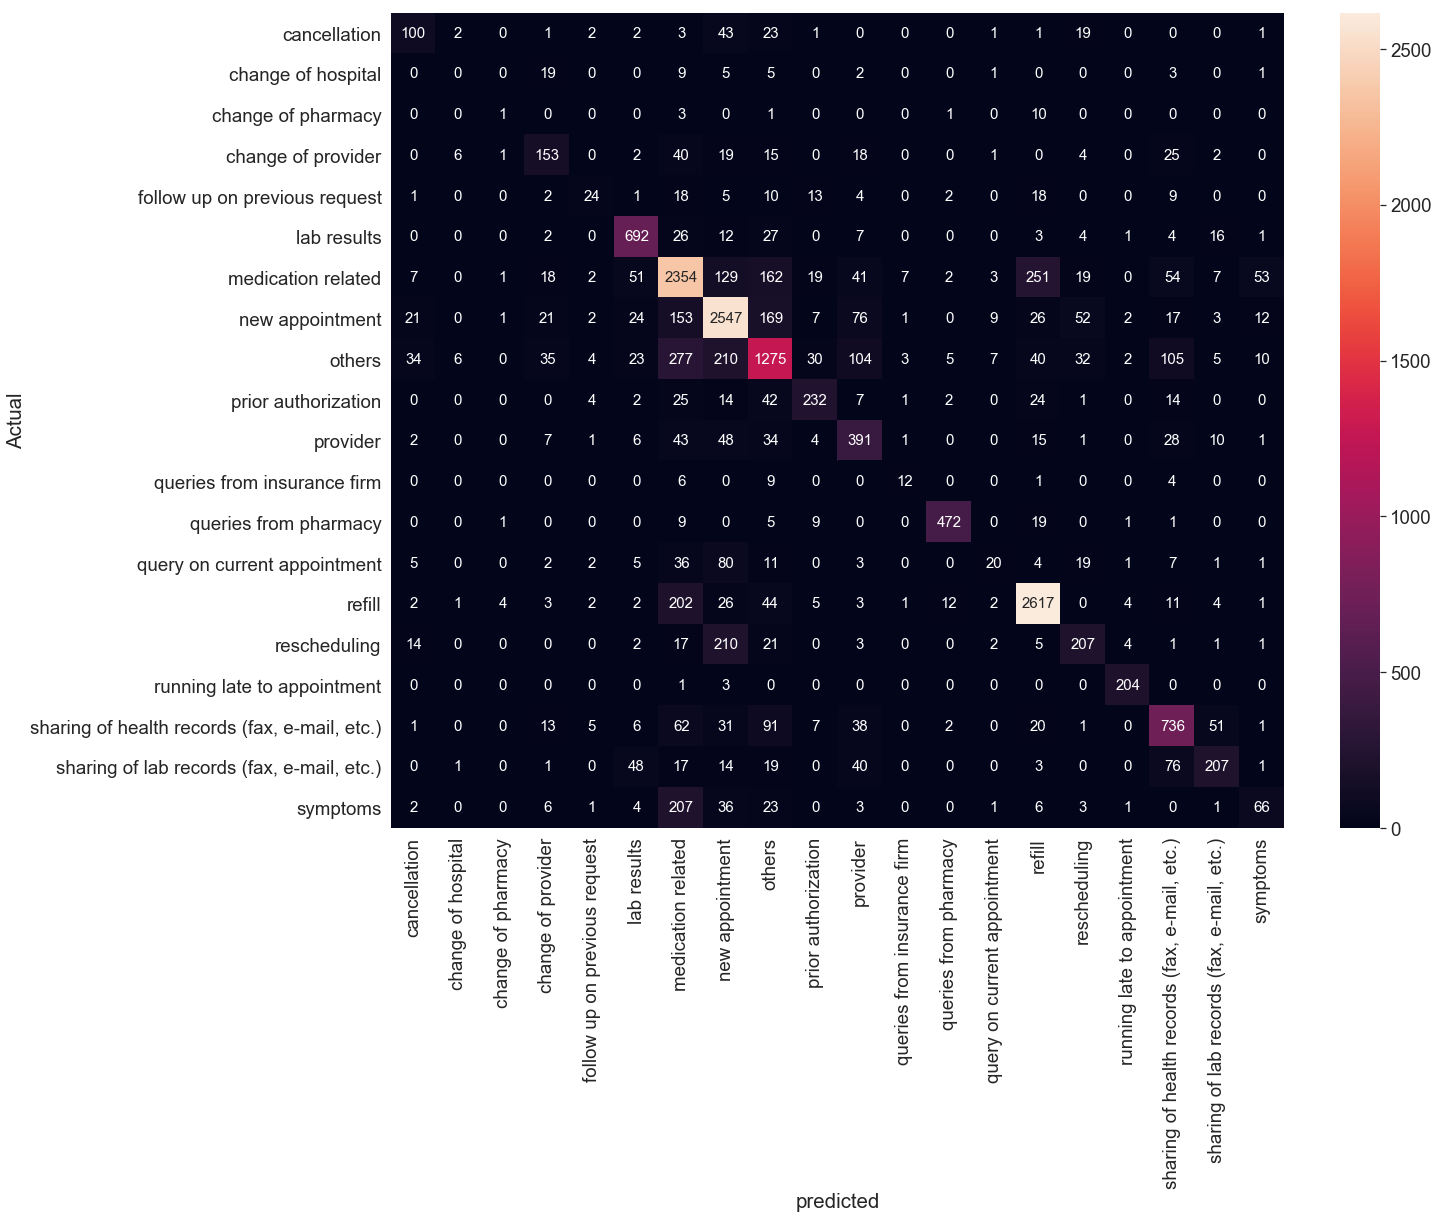

In [84]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, gbc_pred)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, gbc_pred, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

plt.figure(figsize=(20, 15))
sn.set(font_scale=1.7)
sn.heatmap(cm, annot=True, annot_kws={"size":15}, fmt=".0f")
plt.show()

In [85]:
# pickle the gradient boost
filename = 'gbc_unigram.sav'
pickle.dump(gbc, open(filename, 'wb'))

## Problem of class imbalance
Only 5 classes are more than 5 % of total train values. <br> This explains the why <b>change of hospital</b> and <b>change of pharmacy</b> aren't classified at least once. And also the problem in classifying <b>symptoms</b>, <b>queries from insurance firm</b>, <b>follow up on previous request</b>, <b>provider</b>.

## Combining sub_categories

In [86]:
# combine the sharing of health records and sharing of lab records to sharing of records
sub_categories2 = data_final.sub_categories.copy()
for i in range(len(sub_categories2)):
    if sub_categories2[i] in ["sharing of lab records (fax, e-mail, etc.)", "sharing of health records (fax, e-mail, etc.)"]:
        sub_categories2[i] = "sharing of records"

In [87]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_final.converse_tokens, sub_categories2, 
                                                    stratify=sub_categories2.tolist(), random_state=13, test_size=0.3)
# x_train2, x_test2, y_train2, y_test2 = train_test_split(X, data_final.ix[:, "sub_categories"], 
#                                                     stratify=data_final.sub_categories.tolist(), random_state=13)

In [88]:
for i in range(len(x_train)):
    x_train.ix[i] = " ".join(x_train.ix[i])
x_train.head(1)

for i in range(len(x_test)):
    x_test.ix[i] = " ".join(x_test.ix[i])
x_test.head(1)

fileid
2015353791001    home phone call patient patient call becaus need refil diam pharmaci call taken march follow md ...
Name: converse_tokens, dtype: object

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy.sparse

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=0.001, stop_words="english", max_df=0.95)
countf = CountVectorizer(ngram_range=(1,2), min_df=0.001, stop_words="english", max_df=0.95)
X_tfidf = tfidf.fit_transform(x_train.astype("U"))
X_countf = countf.fit_transform(x_train.astype("U"))
X_train = X_tfidf + X_countf
X_test = tfidf.transform(x_test)+countf.transform(x_test)

In [90]:
X_train.shape

(40081, 7565)

In [91]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

pred_nb = clf.predict(X_test)

In [92]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, pred_nb)
pre = precision_score(y_test, pred_nb, average = 'macro')
rec = recall_score(y_test, pred_nb, average = 'macro')
f1 = f1_score(y_test, pred_nb, average = 'macro')
print("accuracy: ", acc,"\nprecision: ", pre,"\nrecall: ", rec, "\nf1: ", f1)
print("kappa score: ", cohen_kappa_score(y_test, pred_nb))

accuracy:  0.583537082315 
precision:  0.45015971465 
recall:  0.536990149206 
f1:  0.461782907294
kappa score:  0.536987605897


## Random Forest on sub_categories combined

In [93]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier(n_estimators=100, max_depth=1000, max_features="sqrt", class_weight="balanced_subsample").fit(X_train, y_train)

CPU times: user 2min 42s, sys: 1.78 s, total: 2min 44s
Wall time: 2min 47s


In [94]:
# let's save model to disk using pickle
import pickle

filename = 'rfc_cat.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [95]:
# testing pickle
# load the model from disk
pickled_rfc = pickle.load(open(filename, 'rb'))
pred_rfc = pickled_rfc.predict(X_test)

In [96]:
warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score
# pred_rfc = rfc.predict(x_test)
acc = accuracy_score(y_test, pred_rfc)
pre = precision_score(y_test, pred_rfc, average = 'macro')
rec = recall_score(y_test, pred_rfc, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, pred_rfc))

accuracy:  0.704680405169 
 precision:  0.662189259326 
 recall:  0.473646056379
kappa score:  0.655995164384


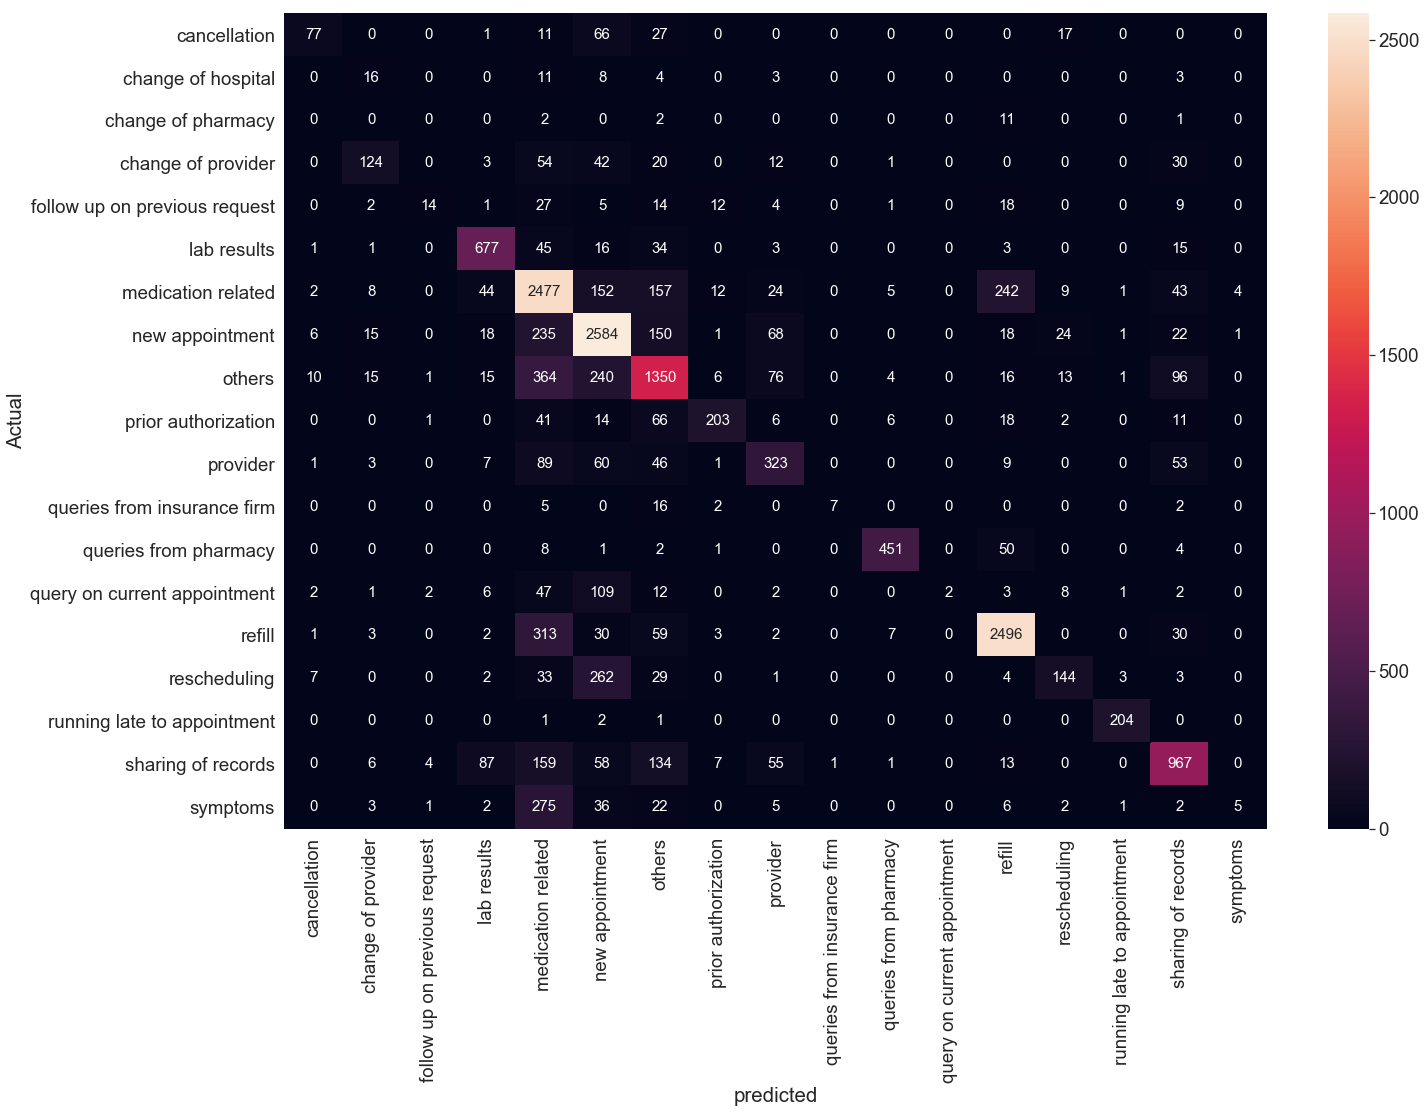

In [97]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, pred_rfc)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, pred_rfc, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

plt.figure(figsize=(22, 15))
sn.set(font_scale=1.7)
sn.heatmap(cm, annot=True, annot_kws={"size":15}, fmt=".0f")
plt.show()

## logistic on categories combined

In [98]:
%%time
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=10, penalty='l2', class_weight="balanced")
logreg.fit(X_train, y_train)

CPU times: user 2min 51s, sys: 1.4 s, total: 2min 52s
Wall time: 2min 55s


In [99]:
pred_log = logreg.predict(X_test)

warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score
acc = accuracy_score(y_test, pred_log)
pre = precision_score(y_test, pred_log, average = 'macro')
rec = recall_score(y_test, pred_log, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, pred_log))

accuracy:  0.67347770404 
 precision:  0.53431992682 
 recall:  0.530666867113
kappa score:  0.626222315255


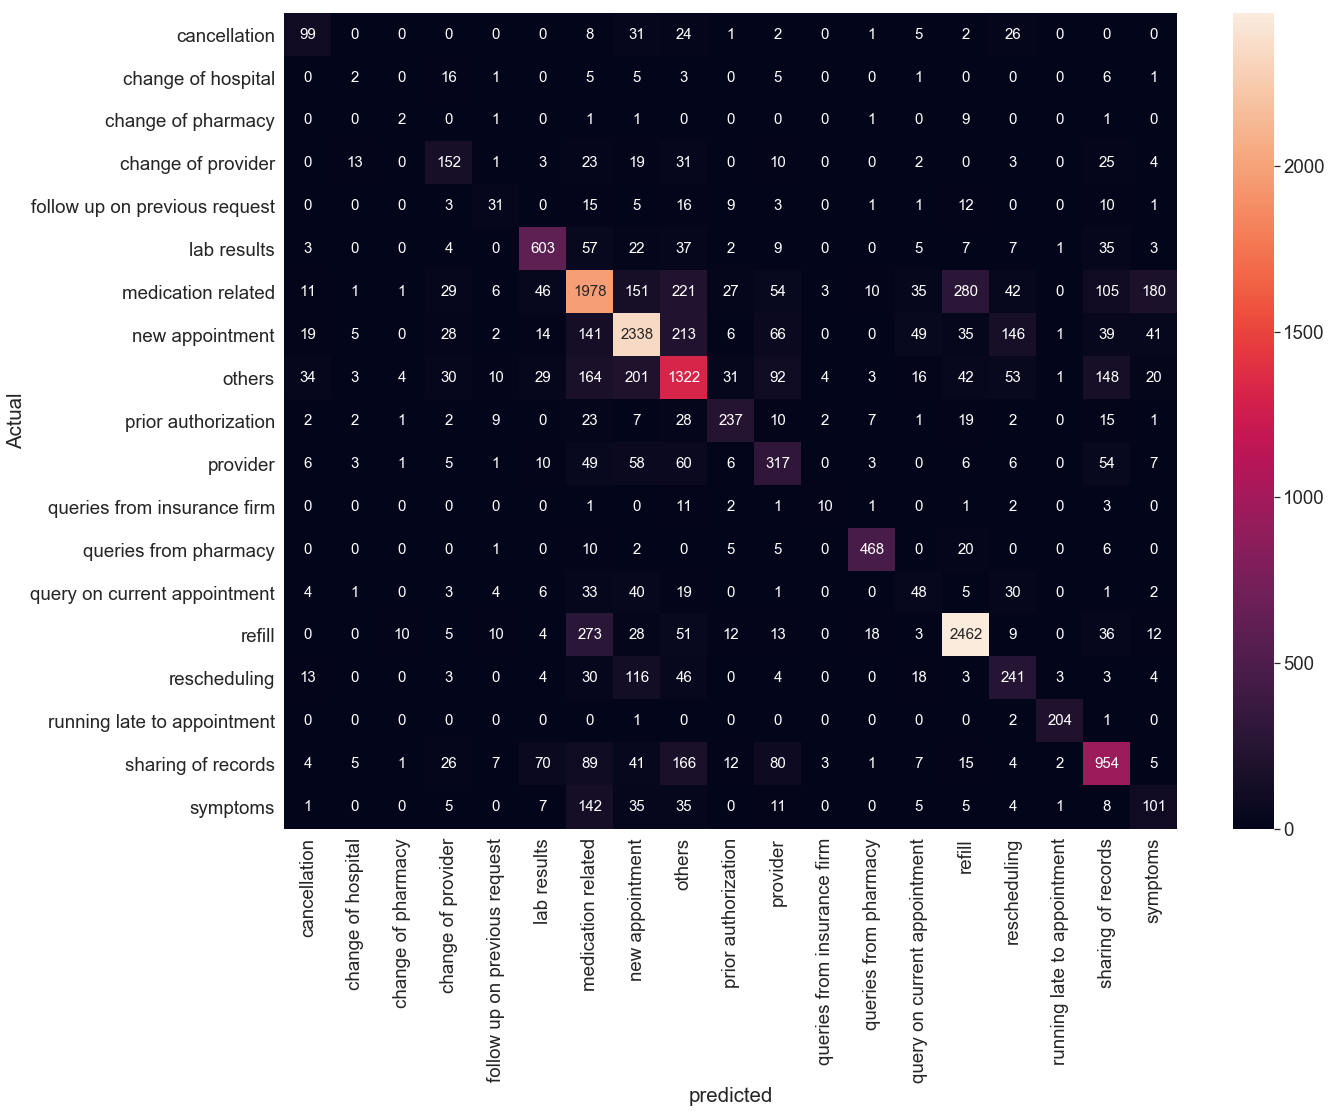

In [100]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, pred_log)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, pred_log, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

fig, ax = plt.subplots(figsize=(20,15))
sn.set(font_scale=1.7)
cm_plot = sn.heatmap(cm, annot=True, annot_kws={"size":15}, ax=ax, fmt=".0f")#, square=True)
fig = cm_plot.get_figure()
fig.savefig("cm_lg")

## Extracting Features

In [101]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_final, sub_categories2, test_size=0.3, 
                                                    stratify=sub_categories2.tolist(), random_state=13)

train_x.sub_categories = sub_categories2

In [102]:
feature_df = train_x.ix[:, 1:3]

feature_df.head(3)

,sub_categories,converse_tokens
fileid,,
2015618171001,refill,"[rx, call, home, phone, caller, patient, prescript, refil, mirapex, er, mg, oral, xr, tab, po, d..."
2015759361001,sharing of records,"[patient, call, order, labwork, home, phone, ell, phone, caller, patient, patient, call, state, ..."
20151108361001,change of hospital,"[mon, request, ing, refer, raleigh, went, allegro, test, care, call, name, call, mon, mon, reque..."


In [103]:
feature_final = feature_df.groupby("sub_categories").sum()

In [104]:
feature_f = feature_final.copy()

In [105]:
pd.options.display.max_rows=100
feature_f.head(20)

,converse_tokens
sub_categories,
cancellation,"[patient, refu, see, md, caller, name, sister, caller, rel, appoint, patient, agr, go, ani, doct..."
change of hospital,"[mon, request, ing, refer, raleigh, went, allegro, test, care, call, name, call, mon, mon, reque..."
change of pharmacy,"[patient, call, give, updat, pharmaci, inform, home, phone, caller, walmart, call, taken, april,..."
change of provider,"[request, addtion, record, per, referr, incom, call, caller, name, caller, duke, home, health, r..."
follow up on previous request,"[patient, call, speak, rn, aobut, rx, refil, caller, patient, prescript, prescript, comment, pat..."
lab results,"[nc, result, plea, advi, home, phone, caller, patient, test, result, emg, ncv, call, taken, marc..."
medication related,"[work, request, patient, ha, copaxon, month, home, phone, call, patient, appoint, patient, episo..."
new appointment,"[schedul, concuss, test, caller, name, ar, caller, mom, patient, fell, sunday, cudelsac, trip, b..."
others,"[nan, lm, patient, need, know, locat, wakem, day, time, brain, mri, convert, flag, pm, traci, do..."


In [106]:
for i in range(len(feature_f.converse_tokens)):
    feature_f.converse_tokens[i] = " ".join(feature_f.converse_tokens[i])
feature_f.head(3)

,converse_tokens
sub_categories,
cancellation,patient refu see md caller name sister caller rel appoint patient agr go ani doctor appoint appo...
change of hospital,mon request ing refer raleigh went allegro test care call name call mon mon request ing refer ra...
change of pharmacy,patient call give updat pharmaci inform home phone caller walmart call taken april pm follow det...


## Build word clouds of uncommon words for each cateogory

In [164]:
from sklearn.feature_extraction.text import CountVectorizer
count_features = CountVectorizer(ngram_range=(1,1), stop_words="english", min_df=0.0005, max_df=0.25)

In [165]:
features = count_features.fit_transform(feature_f.converse_tokens)
features.shape

(19, 16641)

In [166]:
features_df = pd.DataFrame(features.todense(), columns=count_features.get_feature_names(), index=feature_f.index)

In [167]:
wc_df = pd.DataFrame(columns=["wc_string"], index=feature_f.index)

In [168]:
for i in features_df.index:
    srs = features_df.ix[i][features_df.ix[i] > 0]
    srs_df = srs.reset_index(level=0)
    wc_df.ix[i, "wc_string"] = ""
    for j in range(len(srs_df)):
        wc_df.ix[i, "wc_string"] += (srs_df.ix[j, "index"] + " ") * srs_df.ix[j, i]

In [114]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 4.6MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wcloud(obj):
    return WordCloud(background_color="black",
                     width=1000,
                     height=800,
                     ).generate(obj)

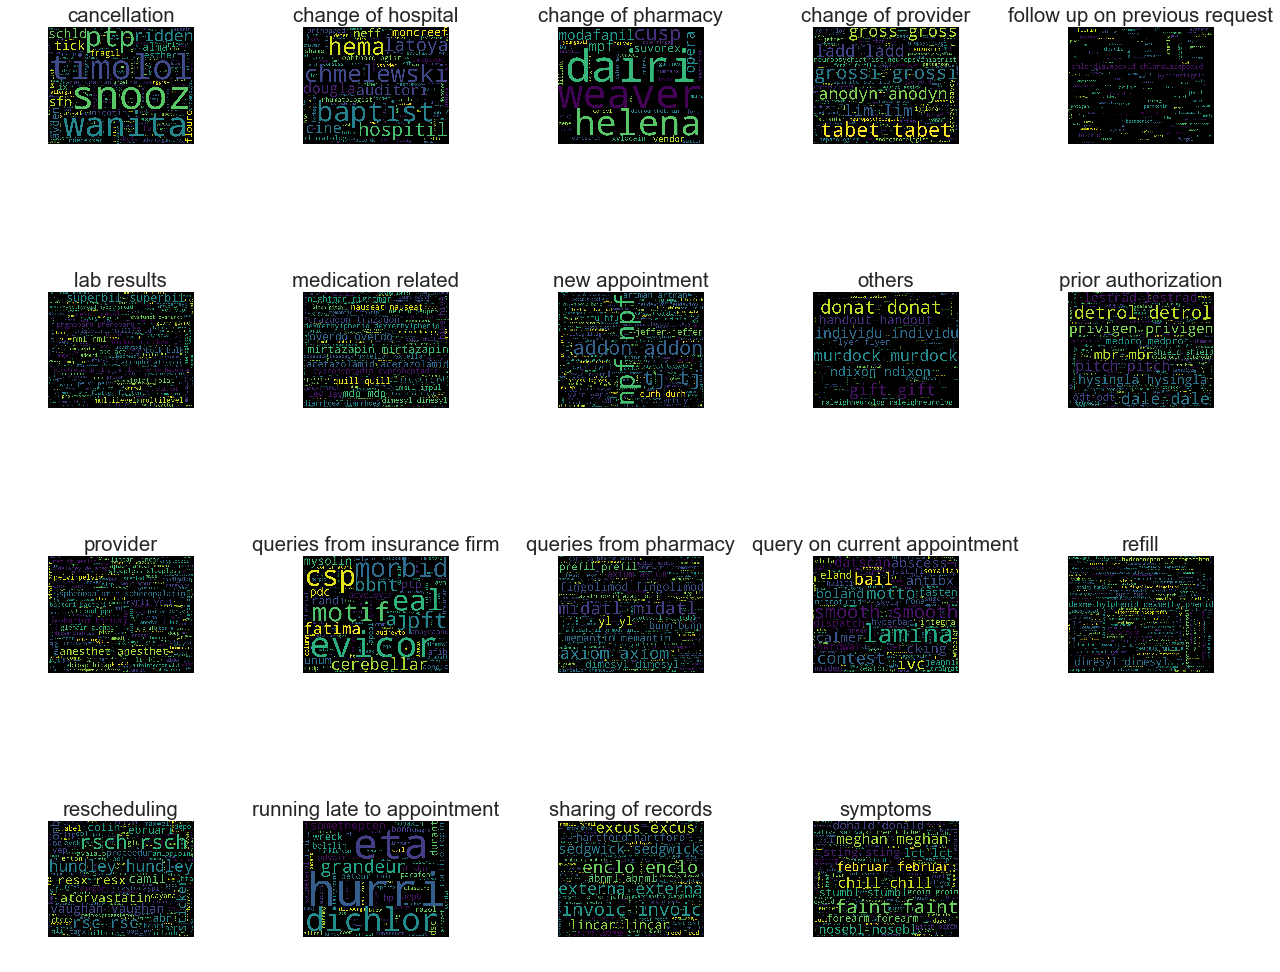

In [170]:
fig = plt.figure(figsize=(18, 15))
fig.patch.set_facecolor("white")
for i in range(len(wc_df.wc_string)):
    ax = fig.add_subplot(4, 5, i+1)
    wc = wcloud(wc_df.wc_string[i])
    ax.imshow(wc)
    ax.set_title(wc_df.index[i])
    ax.axis('off')
fig.tight_layout()
fig.savefig("uncommon_words3.png")

In [ ]:
## Add new Feature Columns

In [252]:
uncommon_words = ["ptp", "cancel", "eeg", "cx", "ridden", "schld", "timolol", "rain", "lv", "ptp", "chappel", 
                  "maleat", "refuss", "unsaf", # cancellation
                  "latoya", "vivian", "litig", "hospitil", "chmelewski", "rhumatolog", "hema", "baptist", 
                  "ophthamologist", "cine", "concuss", # change of hospital
                  "tromethamin", "prenat", "dairi", "vial", "xylocain", "modafanil", "vendor", "weaver",
                  "fum", "omega", "onco", "vendor", "ingl", "timberlak", "garvey", "suvorex",  # change of pharmacy
                  "seavey", "endocrin", "grossi", "teacch", "tabet", "clair", "expertis", "neuropsychiatrist", 
                  "lim", "ladd", "glipizid", "harold", "spirito", "node", "anodyn", "lsvt", # change of provider
                  "butorphanol", "catamaran", "paxil", "chlordiazopoxid", "reuqest", "veleka",
                  "robaxin", "fiorin", "deadlin", "contus", "fungal", "shanik", "cherri", 
                  "cytolog", "everett", "corneliu", "debt", "ldn", "antigen", "betaserion", "lentrada", 
                  # follow up on previous request
                  "superbil", "problm", "resul", "tendenc", "multilevel", "rotect", "thicken", "arthrit", 
                  "pelvi", "atrophi", "phenobarb", "flatten", "gland", "septum", "dysfunct", # lab results
                  "overdos", "mdp", "restarted", "mirtazapin", "oxtellar", "hyper", "lev", "acetazolamid", 
                  "dexmethylphenid", "nightmar", "hive", "impuls", "sonata", "crush", "aggit", "comb", 
                  "cyproheptadin", "memantin", "trazadon", "ketamin", "behavoir", "dosepack", # medication related
                  "npf", "map", "tj", "addon", "recds", "sem", "jeffer", "hfu", "faint", "km", "adolesc", 
                  "durh", "lacross", "briefli", "backward", "asso", "yerr", "oberlin", "gateway", "neudeviov", 
                  "pllc", "hockey", "boic", "footbal", "cloth", "smell", # new appointment
                  "vital", "measur", "ndixon", "murdock", "donat", "flyer", "gift", "individu", "handout", "addend", 
                  "paim", "mutual", "reset", "hartford", "metlif", "transact", "newrx", "nyberg", "voluntari", # others
                  "dougherty", "lidoderm", "detrol", "dale", "sq", "qty", "mbr", "medpro", "ptch", "odt", 
                  "privigen", "tolterodin", "davita", "xenazin", "hysingla", "shield", "um", "zaleplon", # prior authorization
                  "odansetron", "anesthet", "anaer", "aer", "bacteri", "barium", "delaney", "cytolog", "pelvi", "ganglion", 
                  "vdrl", "ppd", "hunt", "pall", "epr", "wout", "sphenopalatin", "pw", "det", "burden", # provider
                  "morbid", "pft", "evicor", "fatima", "bbnt", "ptp", "eal", "csp", "ovn", "cerebellar", "pdc", 
                  "aj", "dyspnea", "territori", "diabail", "ramaswami", "insufficiencey", "lortab", # queries from insurance
                  "axium", "lion", "medco", "fingolimod", "memantin", "axiom", "midatlant", "realo", 
                  "xenazin", "scottsdal", "modafinil", "pharmcist", "chancellor", "dea", # queries from pharmacy
                  "tamika", "smoot", "filter", "turnier", "ivc", "mottl", "born", "skylar", "cking", "pllc", 
                  "maiden", "sameday", "hardwar", "boland", "dat", "thread", # query on current appointment
                  "dimesyl", "dexmethylphenid", "susr", "vicodin", "falk", "durages", "hydromorphon", "hod", "memantin", 
                  "scottsdal", "ptch", "mailord", "fiorin", "vicoprofen", "fingolimod", "avinza", "neuralg", "midatlant", 
                  "acetazolamid", "dolophin", "chlordiazepoxid", # refill
                  "rsc", "rsch", "resx", "hundley", "vaughan", "sticker", "npo", "resxd", "ebruari", "colin", "availab", 
                  "sxd", "vep", "sameday", "abr", "atorvastatin", "canx", "provent", "rescheul", "flip", 
                  "dbl", "ali", "tallry", "depo", # rescheduling
                  "eta", "wreck", "traffic", "hurri", "dichlor", "projected", "triniti", "unprofession", "verfi", "disku", 
                  "puff", "beltin", "aepb", "whther", "suck", "parafon", "rain", "salmeterol", "rig", 
                  "detour", "anaesthesia", "lockdown", "hp", "razol", "escort", # running late to appointment
                  "juri", "invoic", "abnml", "enclos", "letterhead", "certif", "remail", "schneider", "densiti", "termin", 
                  "legaci", "cmn", "hartford", "grace", "varicella", "dd", "healthwel", "nephrolog", "premier", 
                  "sedgwick", "guardianship", "reed", "clerk", "rft", "xdr", "lander", "bank", # sharing of records
                  "spin", "meghan", "thigh", "bruis", "fever", "chill", "motrin", "redness", "februar", "sting", "shut", "egg", 
                  "forearm", "ground", "hug", "horribl", "kitchen", "goos", "druck", "groin", "puffi", "latuda", "twist", 
                  "stumbl", "noseble", "crawl", "saliva" # symtoms
                 ]

In [253]:
extra_f = pd.DataFrame(index=data_final.index)

In [257]:
for i in uncommon_words:
    for j in data_final.converse_tokens.index:
        if i in data_final.converse_tokens.ix[j]:
            extra_f.ix[j, i] = 1
        else:
            extra_f.ix[j, i] = 0

In [259]:
extra_f.shape

(57259, 351)

In [260]:
extra_f.head(3)

,ptp,cancel,eeg,cx,ridden,schld,timolol,rain,lv,chappel,maleat,refuss,unsaf,latoya,vivian,litig,hospitil,chmelewski,rhumatolog,hema,baptist,ophthamologist,cine,concuss,tromethamin,prenat,dairi,vial,xylocain,modafanil,vendor,weaver,fum,omega,onco,ingl,timberlak,garvey,suvorex,seavey,endocrin,grossi,teacch,tabet,clair,expertis,neuropsychiatrist,lim,ladd,glipizid,harold,spirito,node,anodyn,lsvt,butorphanol,catamaran,paxil,chlordiazopoxid,reuqest,veleka,robaxin,fiorin,deadlin,contus,fungal,shanik,cherri,cytolog,everett,corneliu,debt,ldn,antigen,betaserion,lentrada,superbil,problm,resul,tendenc,multilevel,rotect,thicken,arthrit,pelvi,atrophi,phenobarb,flatten,gland,septum,dysfunct,overdos,mdp,restarted,mirtazapin,oxtellar,hyper,lev,acetazolamid,dexmethylphenid,nightmar,hive,impuls,sonata,crush,aggit,comb,cyproheptadin,memantin,trazadon,ketamin,behavoir,dosepack,npf,map,tj,addon,recds,sem,jeffer,hfu,faint,km,adolesc,durh,lacross,briefli,backward,asso,yerr,oberlin,gateway,neudeviov,pllc,hockey,boic,footbal,cloth,smell,vital,measur,ndixon,murdock,donat,flyer,gift,individu,handout,addend,paim,mutual,reset,hartford,metlif,transact,newrx,nyberg,voluntari,dougherty,lidoderm,detrol,dale,sq,qty,mbr,medpro,ptch,odt,privigen,tolterodin,davita,xenazin,hysingla,shield,um,zaleplon,odansetron,anesthet,anaer,aer,bacteri,barium,delaney,ganglion,vdrl,ppd,hunt,pall,epr,wout,sphenopalatin,pw,det,burden,morbid,pft,evicor,fatima,bbnt,eal,csp,ovn,cerebellar,pdc,aj,dyspnea,territori,diabail,ramaswami,insufficiencey,lortab,axium,lion,medco,fingolimod,axiom,midatlant,realo,scottsdal,modafinil,pharmcist,chancellor,dea,tamika,smoot,filter,turnier,ivc,mottl,born,skylar,cking,maiden,sameday,hardwar,boland,dat,thread,dimesyl,susr,vicodin,falk,durages,hydromorphon,hod,mailord,vicoprofen,avinza,neuralg,dolophin,chlordiazepoxid,rsc,rsch,resx,hundley,vaughan,sticker,npo,resxd,ebruari,colin,availab,sxd,vep,abr,atorvastatin,canx,provent,rescheul,flip,dbl,ali,tallry,depo,eta,wreck,traffic,hurri,dichlor,projected,triniti,unprofession,verfi,disku,puff,beltin,aepb,whther,suck,parafon,salmeterol,rig,detour,anaesthesia,lockdown,hp,razol,escort,juri,invoic,abnml,enclos,letterhead,certif,remail,schneider,densiti,termin,legaci,cmn,grace,varicella,dd,healthwel,nephrolog,premier,sedgwick,guardianship,reed,clerk,rft,xdr,lander,bank,spin,meghan,thigh,bruis,fever,chill,motrin,redness,februar,sting,shut,egg,forearm,ground,hug,horribl,kitchen,goos,druck,groin,puffi,latuda,twist,stumbl,noseble,crawl,saliva
fileid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015561331001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [261]:
train_x_ef, test_x_ef, train_y_ef, test_y_ef = train_test_split(extra_f, sub_categories2, test_size=0.3, 
                                                    stratify=sub_categories2.tolist(), random_state=13)

train_x.sub_categories = sub_categories2

In [262]:
X1_train = scipy.sparse.hstack([X_train,train_x_ef], format="csr")
X1_test = scipy.sparse.hstack([X_test, test_x_ef], format="csr")


In [263]:
print(X_train.shape)
print(train_x_ef.shape)
print(X1_test.shape)

(40081, 7565)
(40081, 351)
(17178, 7916)


In [264]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier(n_estimators=100, max_depth=500, class_weight="balanced_subsample", n_jobs=-1).fit(X1_train, y_train)

CPU times: user 3min 40s, sys: 2.12 s, total: 3min 42s
Wall time: 1min 7s


In [265]:
warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score, accuracy_score, recall_score, precision_score
pred_rfc = rfc.predict(X1_test)
acc = accuracy_score(y_test, pred_rfc)
pre = precision_score(y_test, pred_rfc, average = 'macro')
rec = recall_score(y_test, pred_rfc, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, pred_rfc))

accuracy:  0.705553615089 
 precision:  0.654230694732 
 recall:  0.485713982771
kappa score:  0.657616498216


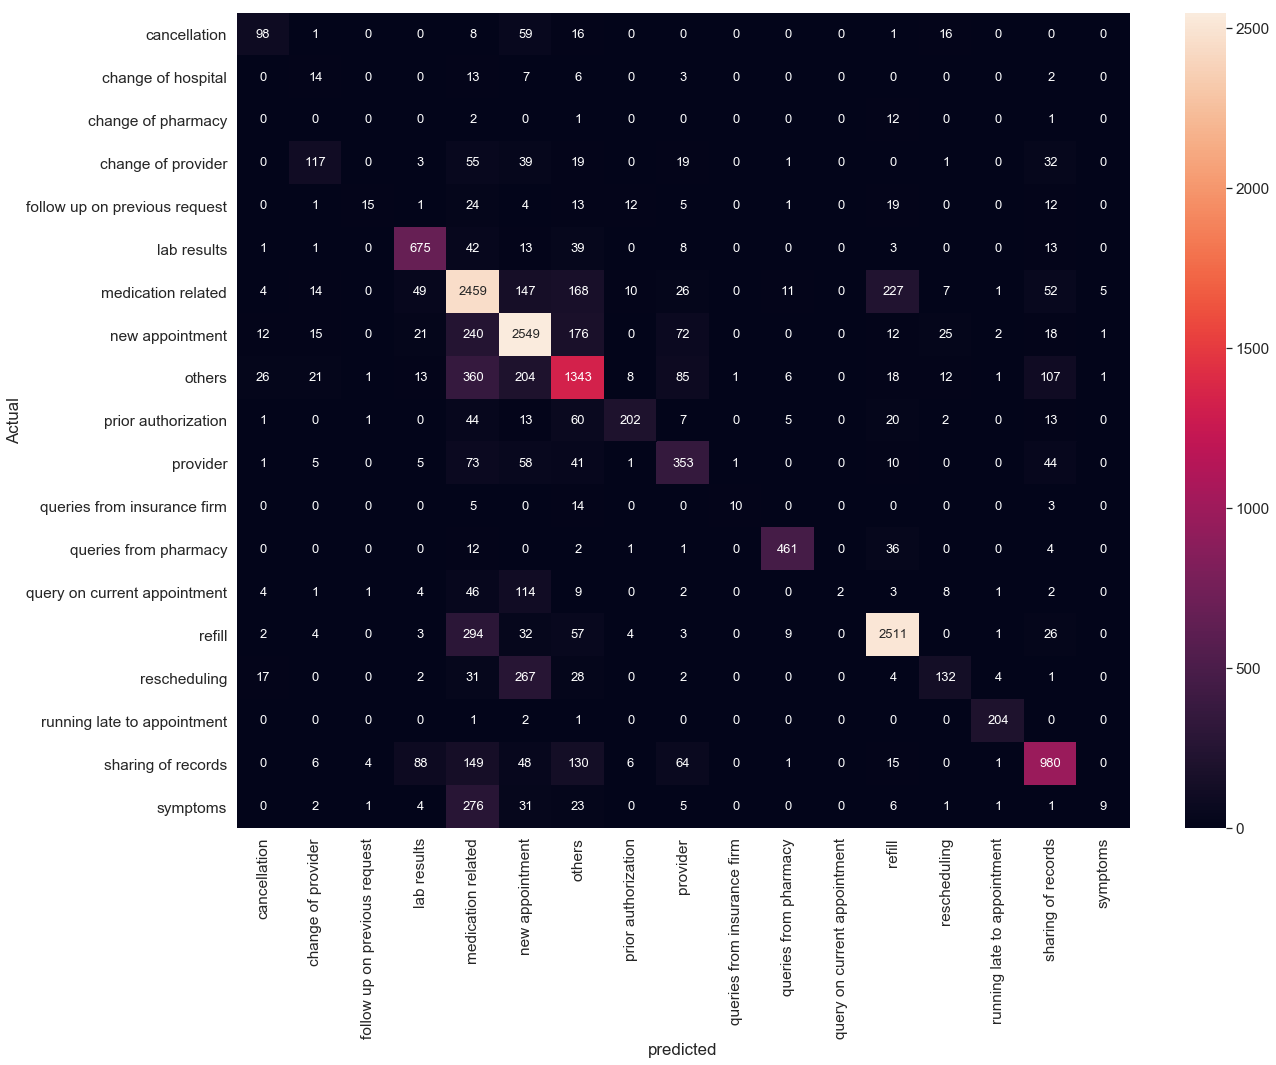

In [266]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, pred_rfc)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, pred_rfc, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

plt.figure(figsize=(10, 7))
plt.figure(figsize=(20, 15))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size":13}, fmt="")
plt.show()

## Logistic on Categories Combined + New Features

In [267]:
%%time
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=10, penalty='l2', class_weight="balanced")
logreg.fit(X1_train, y_train)

CPU times: user 3min 2s, sys: 1.92 s, total: 3min 4s
Wall time: 3min 8s


In [268]:
pred_log = logreg.predict(X1_test)

warnings.filterwarnings(action="ignore")
from sklearn.metrics import cohen_kappa_score
acc = accuracy_score(y_test, pred_log)
pre = precision_score(y_test, pred_log, average = 'macro')
rec = recall_score(y_test, pred_log, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, pred_log))

accuracy:  0.673419490045 
 precision:  0.533516798719 
 recall:  0.530343637518
kappa score:  0.62613999546


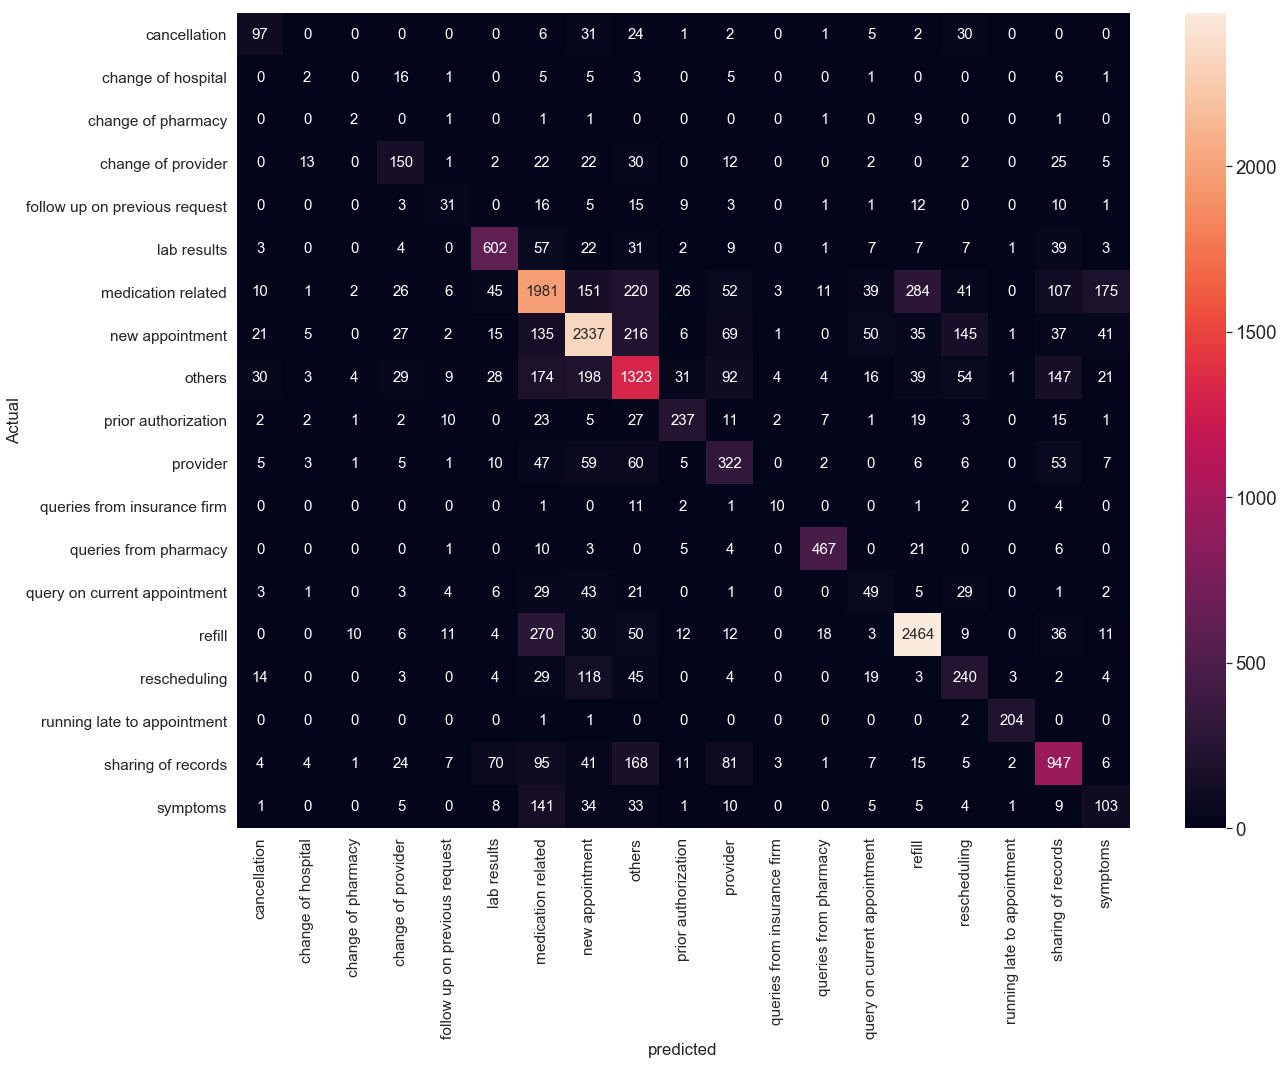

In [269]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, pred_log)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, pred_log, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

fig, ax = plt.subplots(figsize=(20,15))
sn.set(font_scale=1.7)
cm_plot = sn.heatmap(cm, annot=True, annot_kws={"size":15}, ax=ax, fmt=".0f")#, square=True)
fig = cm_plot.get_figure()
fig.savefig("cm_lg_newfeatures")

## Gradient Boost on Categories Combined + New Features

In [270]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, random_state=13).fit(X1_train, y_train)

CPU times: user 31min 6s, sys: 18.1 s, total: 31min 24s
Wall time: 32min 14s


In [273]:
gbc_pred = gbc.predict(X1_test.toarray())

acc = accuracy_score(y_test, gbc_pred)
pre = precision_score(y_test, gbc_pred, average = 'macro')
rec = recall_score(y_test, gbc_pred, average = 'macro')
print("accuracy: ", acc,"\n","precision: ", pre, "\n","recall: ", rec)
print("kappa score: ", cohen_kappa_score(y_test, gbc_pred))
# print(classification_report(y_test, gbc_pred))

accuracy:  0.721795319595 
 precision:  0.579006108917 
 recall:  0.527740469059
kappa score:  0.679159975812


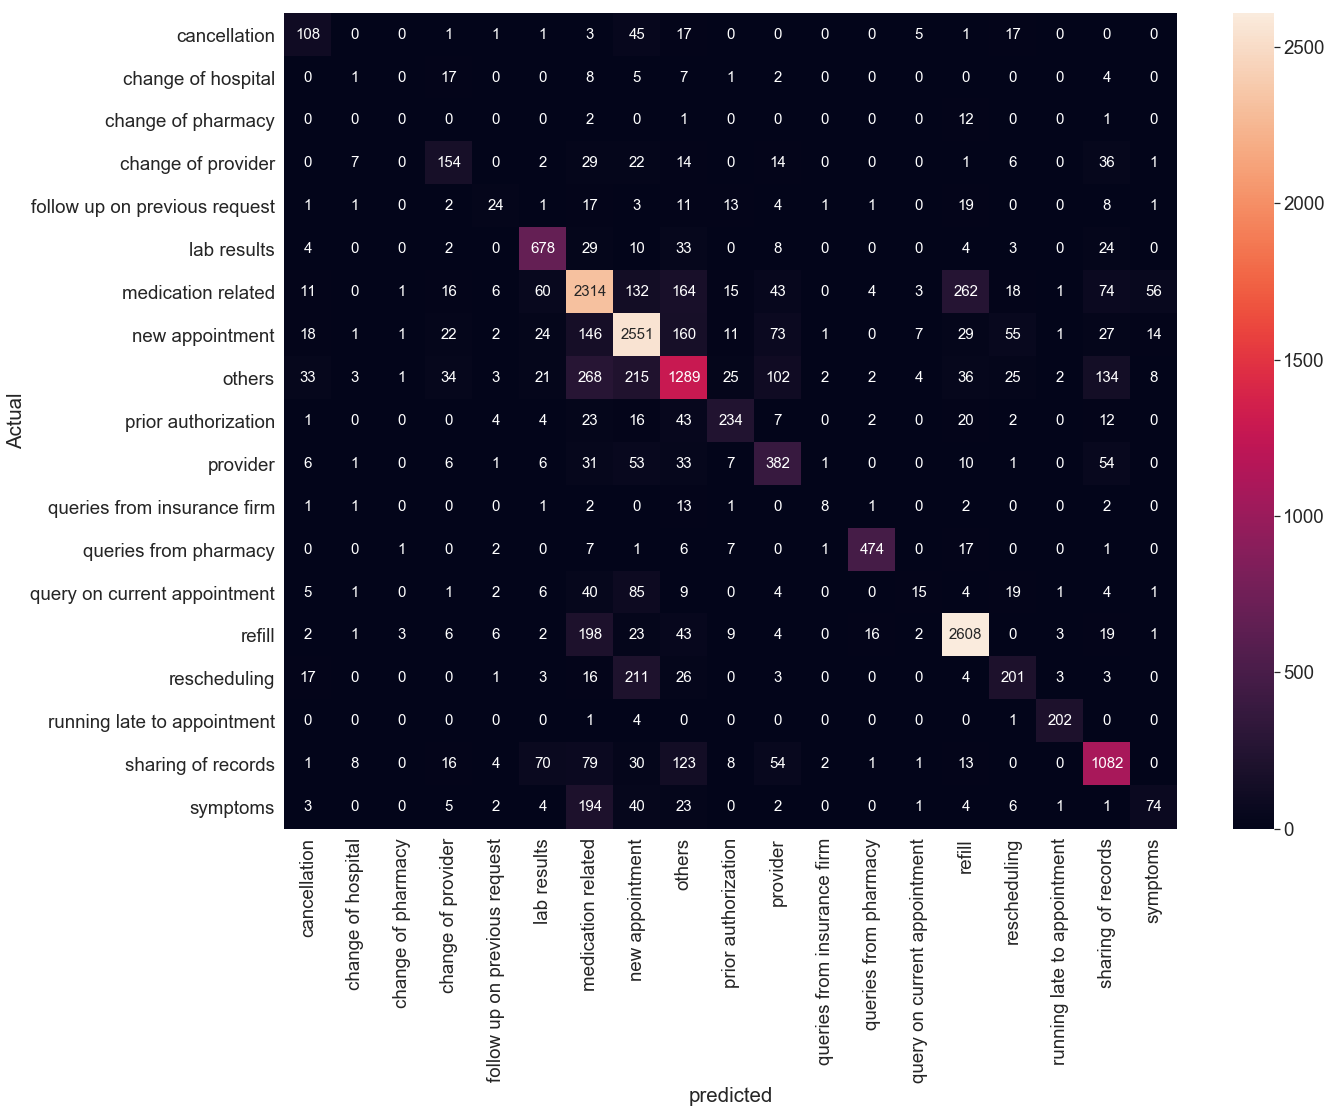

In [282]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cnf_matrix = confusion_matrix(y_test, gbc_pred)#, labels=data_final.sub_categories.tolist())
cnf_matrix

cm = pd.crosstab(y_test, gbc_pred, rownames=["Actual"], colnames=["predicted"])
cm_norm = cm / cm.sum(axis=1)
cm_norm

plt.figure(figsize=(20, 15))
sn.set(font_scale=1.7)
sn.heatmap(cm, annot=True, annot_kws={"size":15}, fmt=".0f")
fig = cm_plot.get_figure()
fig.savefig("GradientBoost_final")